In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('terms_data.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [4]:
df.columns = ['month', 'diet', 'gym', 'finance']  # Rename columns
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [5]:
# Convert 'month' column into a DateTime data type and make it the index of the DataFrame
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [6]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'Year')

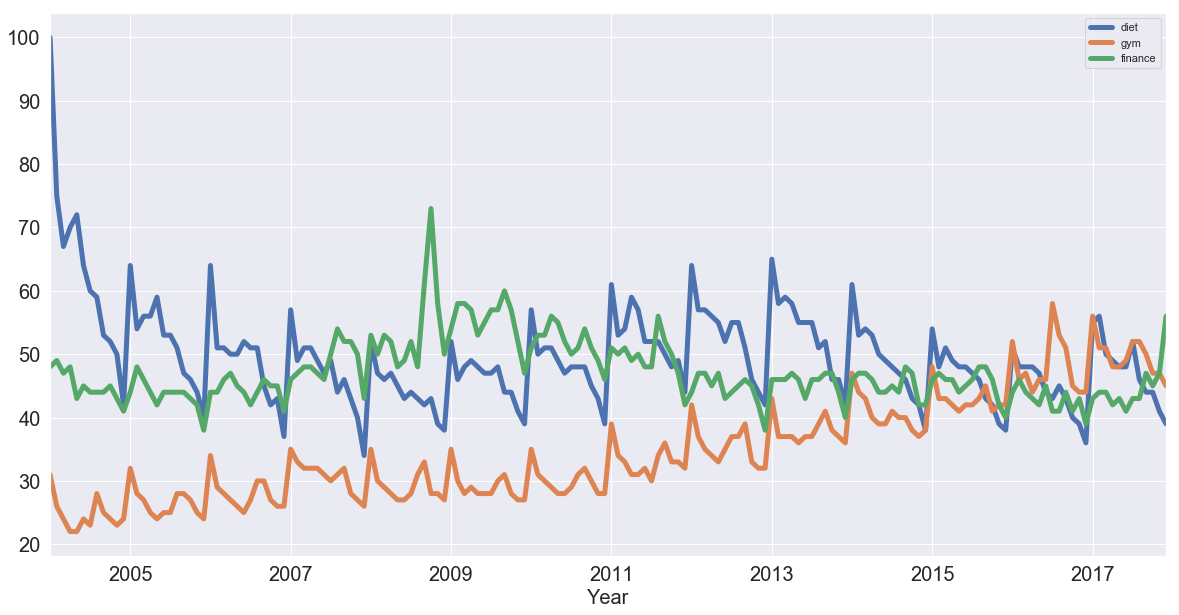

In [7]:
df.plot(figsize=(10,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

##### Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

Text(0.5, 0, 'Year')

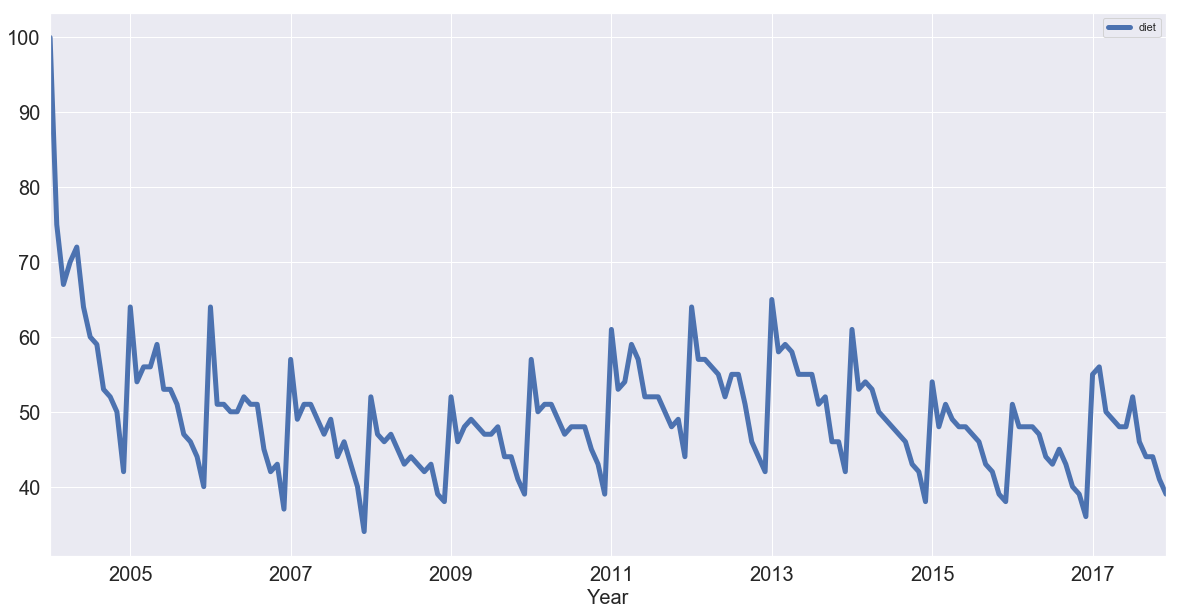

In [8]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

**Note**: The first thing to notice is that there is seasonality: each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

# Identifying Trends in Time Series

**Moving Average:** For each time point, take the average of the points on either side of it. The number of points is specified by a window size. When you take the average, it tends to smooth out noise and seasonality.

Text(0.5, 0, 'Year')

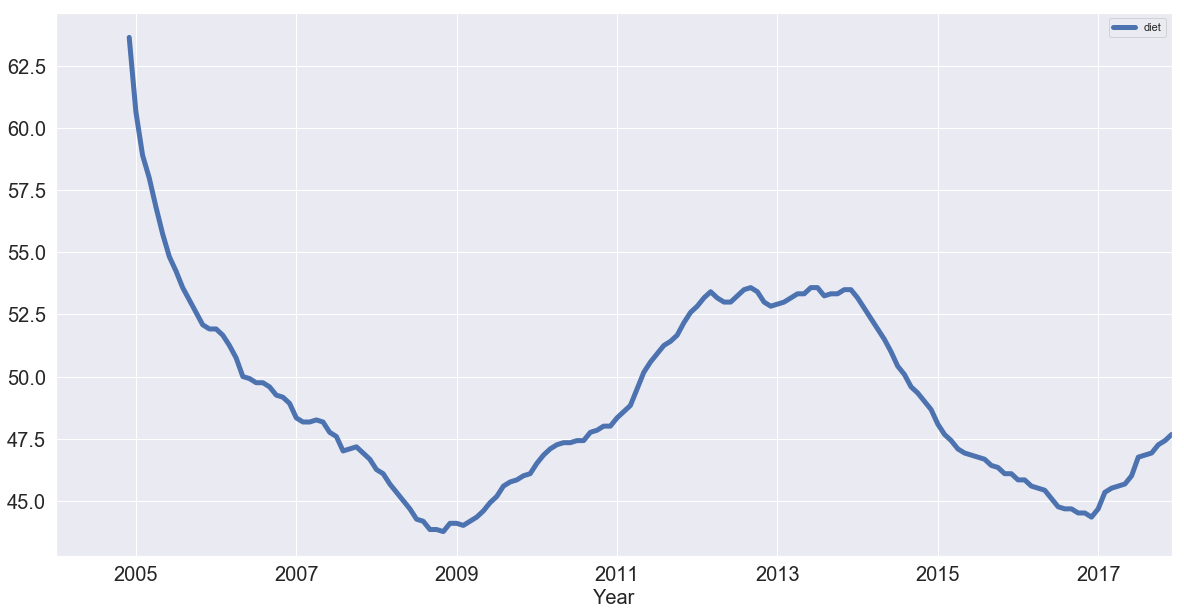

In [9]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

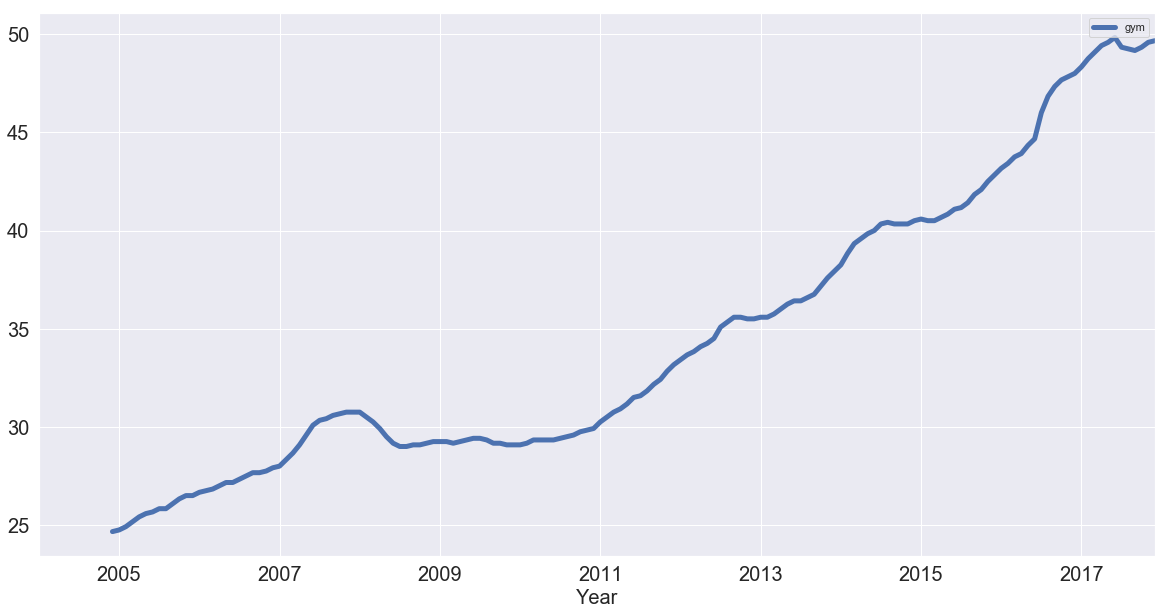

In [10]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

We have successfully removed the seasonality and you see an upward trend for "gym"! But how do these two search terms compare?

Text(0.5, 0, 'Year')

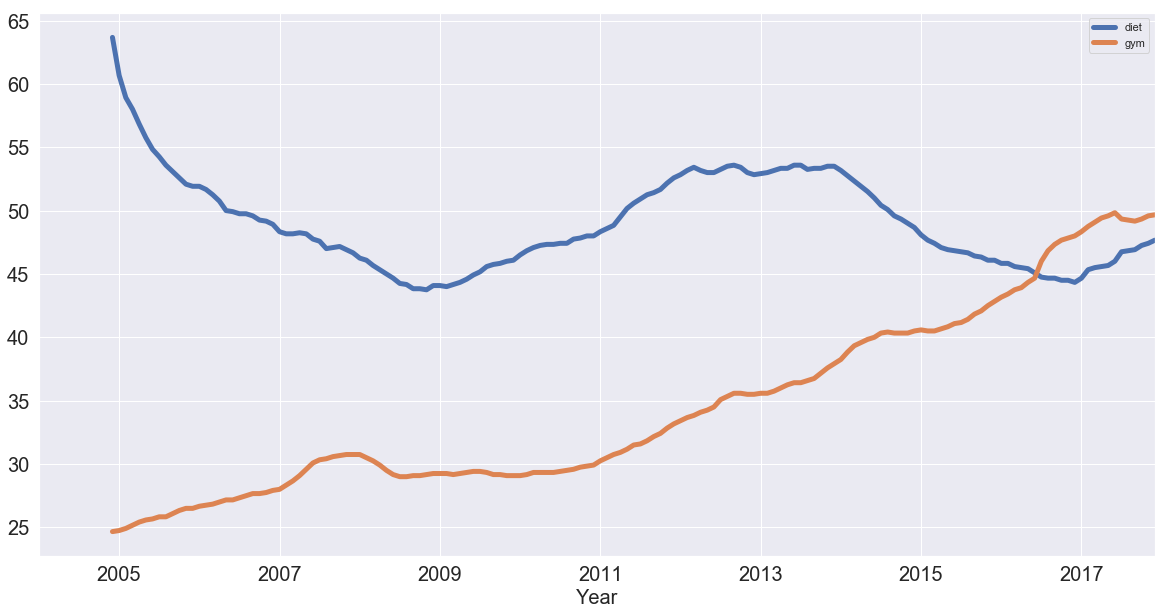

In [11]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

So now, removing the seasonality, you see that diet potentially has some form of seasonality, whereas gym is actually increasing! With the trends in the data identified, it's time to think about seasonality, which is the repetitive nature of your time series.

# Seasonal Patterns in Time Series Data

One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

**First-order differencing:**
You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'diet' Series:

Text(0.5, 0, 'Year')

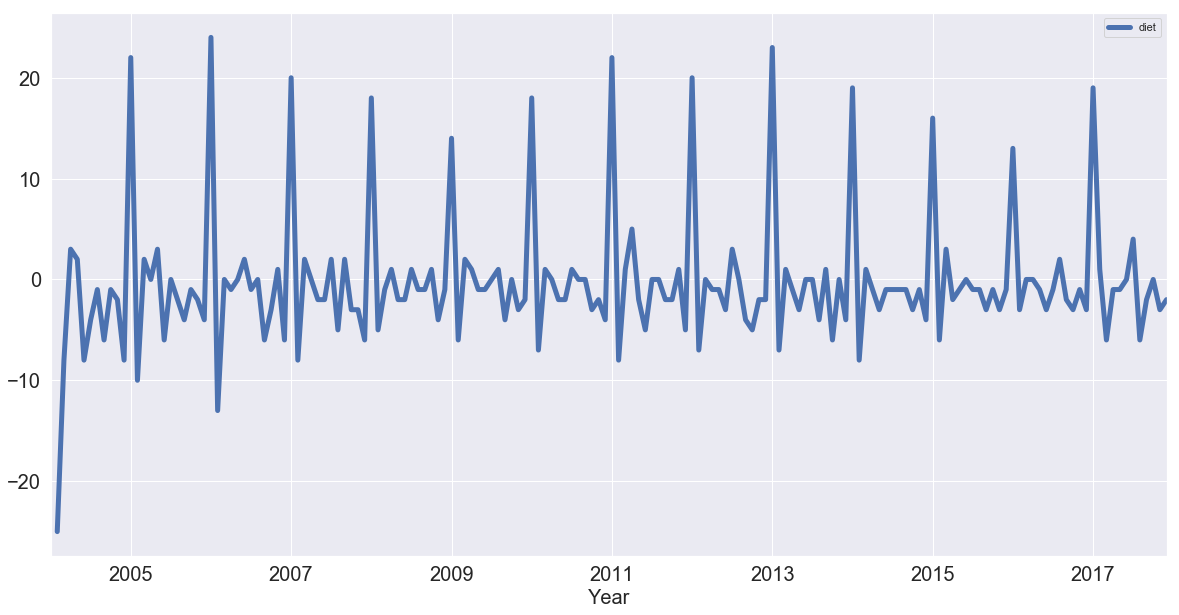

In [12]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

See that you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!
You can also perform 2nd order differencing, which means that you would be looking at the difference between one data point and the two that precede it, if the trend is not yet entirely removed.

Differencing is super helpful in turning your time series into a stationary time series. You won't get too much into these here but a stationary time series is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

# Periodicity and Autocorrelation

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

In [13]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Let's focus on 'diet' and 'gym'; They are negatively correlated. That's very interesting! Remember that you have a seasonal and a trend component. From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

The actual correlation coefficient is actually capturing both of those.

What you want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

Start off by plotting the first-order differences with the help of .diff() and .plot():

Text(0.5, 0, 'Year')

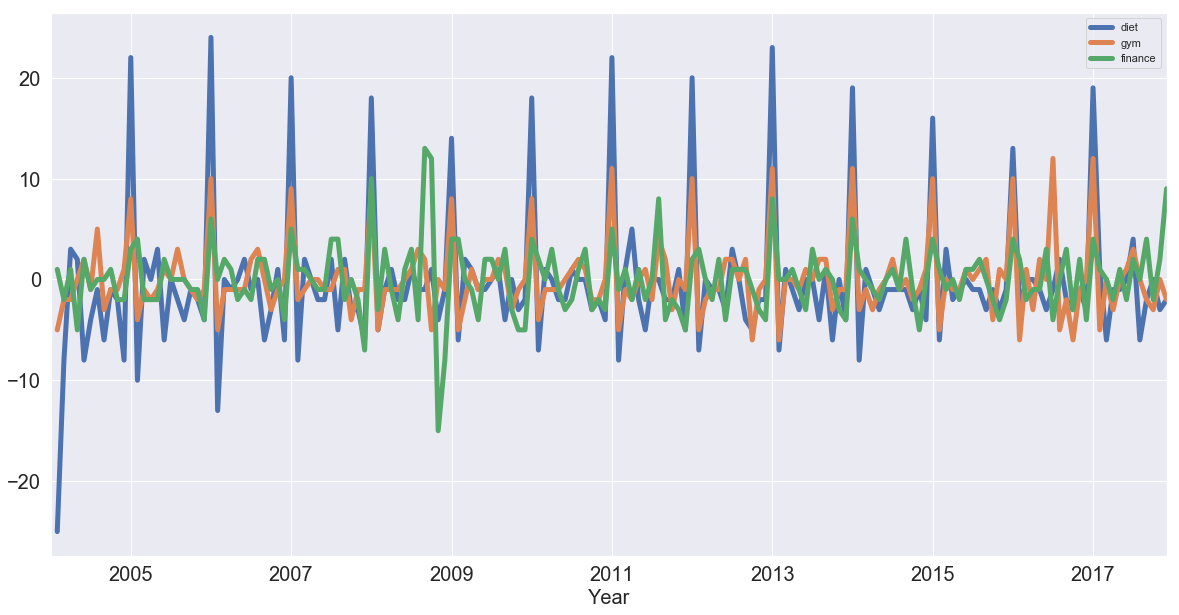

In [14]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

You see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:

In [15]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


Note that once again, there was a slight negative correlation when you were thinking about the trend and the seasonal component. Now, you can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.76.

# Autocorrelation

Now you've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

Here, you'll look at the plot and what you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

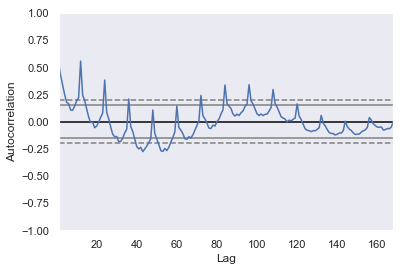

In [16]:
pd.plotting.autocorrelation_plot(diet);

If you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. You have another peak at a 24 month interval, where it's also correlated with itself. You have another peak at 36, but as you move further away, there's less and less of a correlation.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

You have identified the seasonality of this 12 month repetition!